In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
import random
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

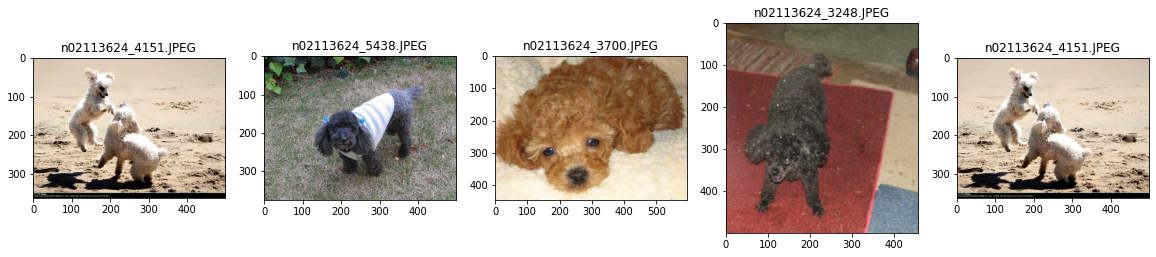

In [2]:
plt.figure(figsize=(20,20))
test_folder = r'D:\Documents\Final Year Sem VII\Final Year Project\Dimensionality reduction\datasets\imagenet 1000(mini)\imagenet-mini\train\n02113624'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path = os.path.join(test_folder,file)
    img = mpimg.imread(image_path)
    ax = plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [3]:
IMG_WIDTH = 200
IMG_HEIGHT = 200
img_folder = r'D:\Documents\Final Year Sem VII\Final Year Project\Dimensionality reduction\datasets\imagenet 1000(mini)\imagenet-mini\train'

In [ ]:
def create_dataset(img_folder):
    img_data_array=[]
    class_name=[]
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            
            image_path = os.path.join(img_folder, dir1, file)
            image = cv2.imread(image_path,cv2.COLOR_BGR2RGB)
            image = cv2.resize(image,(IMG_HEIGHT, IMG_WIDTH), interpolation = cv2.INTER_AREA)
            image = np.array(image)
            image = image.astype('float32')
            image /= 255
            img_data_array.append(image)
            class_name.append(dir1)
            
    return img_data_array, class_name

# extract the image array and class_name
img_data, class_name = create_dataset(r'D:\Documents\Final Year Sem VII\Final Year Project\Dimensionality reduction\datasets\imagenet 1000(mini)\imagenet-mini\train')

In [ ]:
target_dict = {k: v fro v, k in enumerate(np.unique(class_name))}
target_dict

In [ ]:
target_val = [target_dict[class_name[i]] for i in range(len(class_name))]

In [ ]:
model=tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
            tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(6)
        ])
encoder.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x=np.array(img_data, np.float32), y=np.array(list(map(int,target_val)), np.float32), epochs=5)